# Assignment 2 - BUSA8001 Applied Predictive Analytics
* Student name: Hea Rang Heo
* Student number: 48133981

---
## Exploratory Data Analysis

In [106]:
# Import Pandas and Numpy packages and read CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/Users/hearangheo/Desktop/BUSA8001 Applied Predictive Analytics/Assignment2/data/data.csv')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [108]:
df.describe()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.60450,0.500500,40.823500,1.456500,137516.196500,0.612500,0.834000
std,0.48908,0.500125,9.455848,0.783846,46184.296588,0.674219,0.967942
min,0.00000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.00000,0.000000,33.000000,1.000000,101262.750000,0.000000,0.000000
50%,1.00000,1.000000,40.000000,1.000000,133004.000000,1.000000,0.000000
75%,1.00000,1.000000,48.000000,2.000000,171232.500000,1.000000,2.000000
max,1.00000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


In [109]:
df['Gender'].value_counts()

Gender
1    1209
0     791
Name: count, dtype: int64

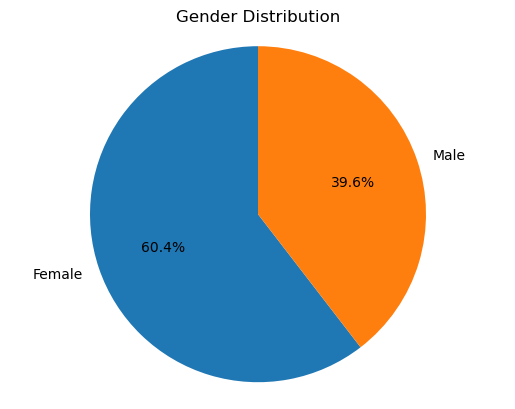

In [110]:
# Map gender values to labels
gender_labels = {0: 'Male', 1: 'Female'}
gender_counts = df['Gender'].map(gender_labels).value_counts()

# Plot
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',         # Shows percentage with 1 decimal place
    startangle=90,             # Starts the pie at the top
    title='Gender Distribution',
    ylabel=''                  # Hides the y-axis label
)

plt.axis('equal')  # Ensures the pie is a circle
plt.show()

In [111]:
df['Marital Status'].value_counts()

Marital Status
1    1001
0     999
Name: count, dtype: int64

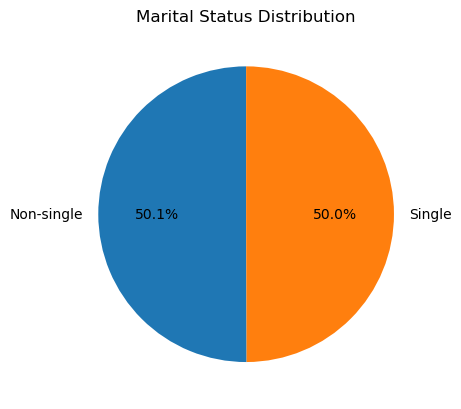

In [112]:
marital_map = {0: "Single", 1: "Non-single"}
df["Marital Status"] = df["Marital Status"].map(marital_map)

df["Marital Status"].value_counts().plot.pie(
    autopct = '%1.1f%%',
    startangle = 90,
    labels = df["Marital Status"].value_counts().index
)

plt.title("Marital Status Distribution")
plt.ylabel('')
plt.show()

/Users/hearangheo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


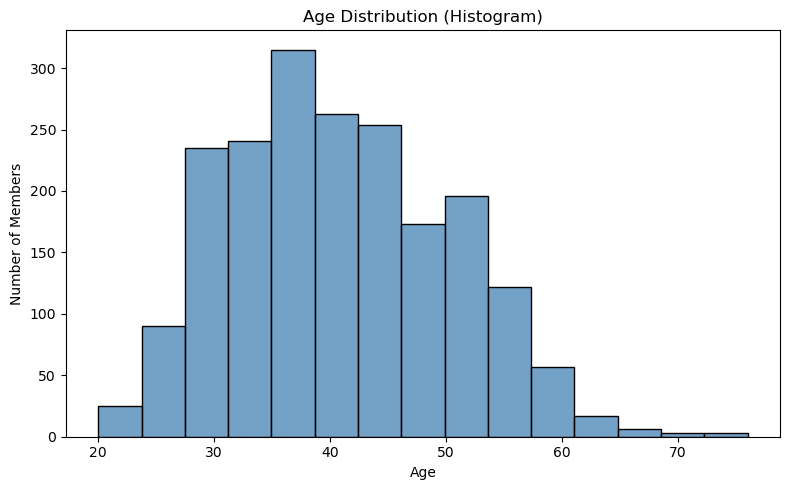

In [113]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=15, color='steelblue')
plt.title("Age Distribution (Histogram)")
plt.xlabel("Age")
plt.ylabel("Number of Members")
plt.tight_layout()
plt.show()


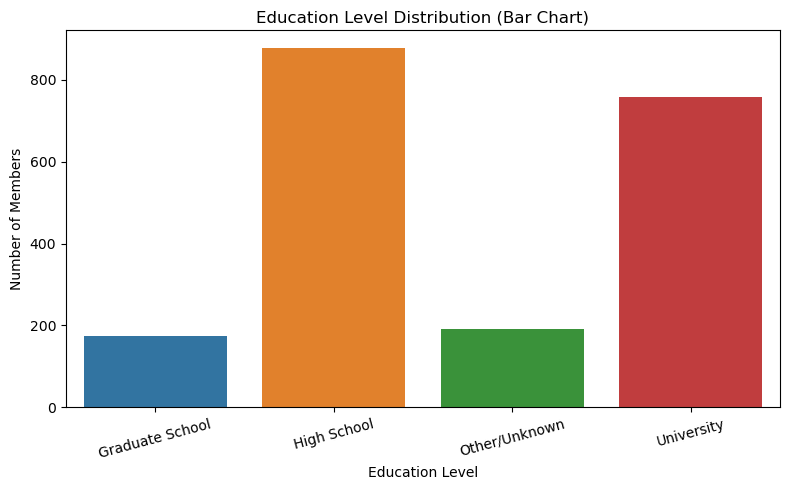

In [114]:
# Map numeric values to education levels
education_map = {
    0: "Other/Unknown",
    1: "High School",
    2: "University",
    3: "Graduate School"
}
df["Education"] = df["Education"].map(education_map)

# Count values
education_counts = df["Education"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title("Education Level Distribution (Bar Chart)")
plt.xlabel("Education Level")
plt.ylabel("Number of Members")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Income Distribution'}, ylabel='Frequency'>

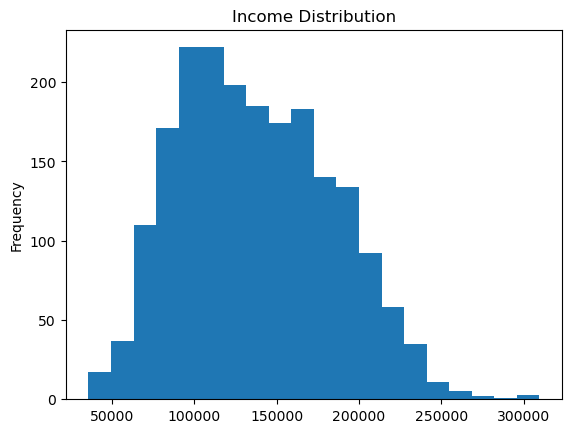

In [115]:
df['Income'].plot(kind='hist', bins=20, title='Income Distribution')

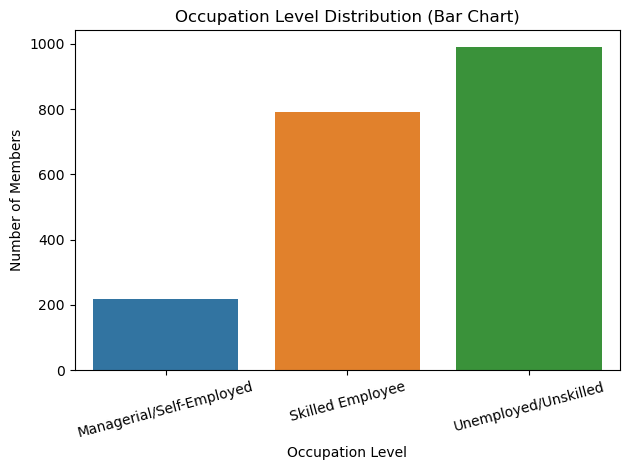

In [116]:
occupation_map = {
    0: "Unemployed/Unskilled",
    1: "Skilled Employee",
    2: "Managerial/Self-Employed"
}
df["Occupation"] = df["Occupation"].map(occupation_map)

# Count values
occupation_counts = df["Occupation"].value_counts().sort_index()

# Plot bar chart
# plt.figure(figsize=(8, 5))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title("Occupation Level Distribution (Bar Chart)")
plt.xlabel("Occupation Level")
plt.ylabel("Number of Members")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Settlement Size Distribution'}, xlabel='Settlement Size'>

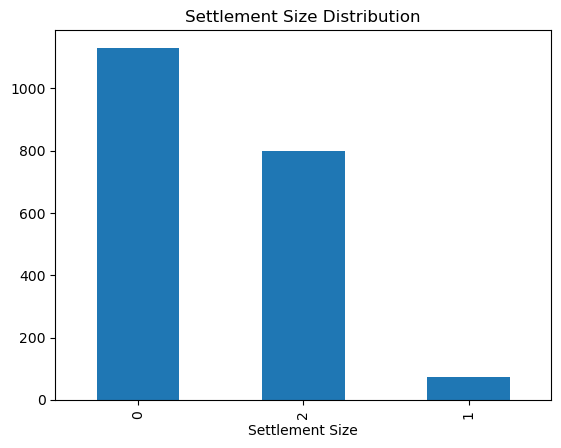

In [117]:
df['Settlement Size'].value_counts().plot(kind='bar', title='Settlement Size Distribution')


In [123]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
label_encoders = {}
for col in ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Customer Segmentation

In [119]:
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.cluster import KMeans, AgglomerativeClustering
# from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


In [120]:
# Standardize Age and Income
scaler = StandardScaler()
df[['Age_scaled', 'Income_scaled']] = scaler.fit_transform(df[['Age', 'Income']])

# Replaced unstandardized variables Age and Income to a new df called df2, to be used for clustering
df2 = df.drop(columns=['Age', 'Income', 'Age_scaled', 'Income_scaled']).copy()
df2[['Age', 'Income']] = df[['Age_scaled', 'Income_scaled']]


In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2000 non-null   int64  
 1   Marital Status   2000 non-null   object 
 2   Education        2000 non-null   object 
 3   Occupation       2000 non-null   object 
 4   Settlement Size  2000 non-null   int64  
 5   Age              2000 non-null   float64
 6   Income           2000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 109.5+ KB


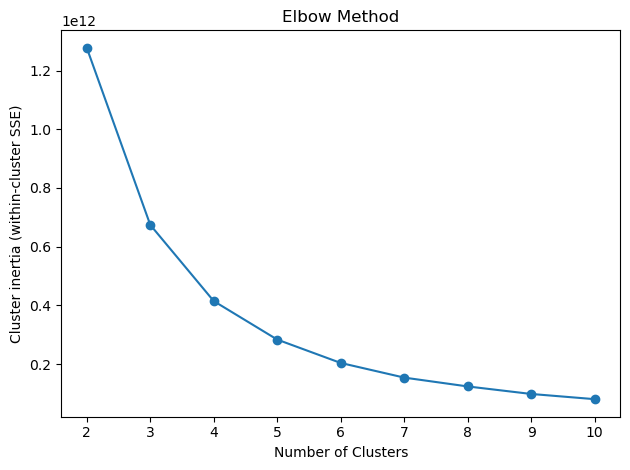

In [125]:
inertias = []
# silhouette_score = []
k_values = range(2,11)

for i in k_values:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_encoded)
    inertias.append(km.inertia_)

# plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(k_values)
plt.tight_layout()
plt.show()

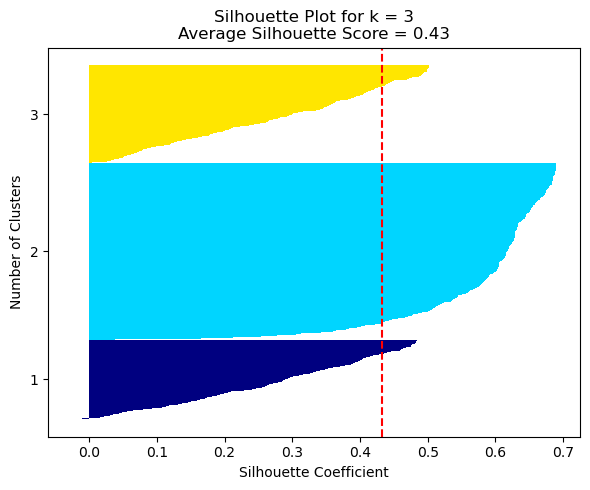

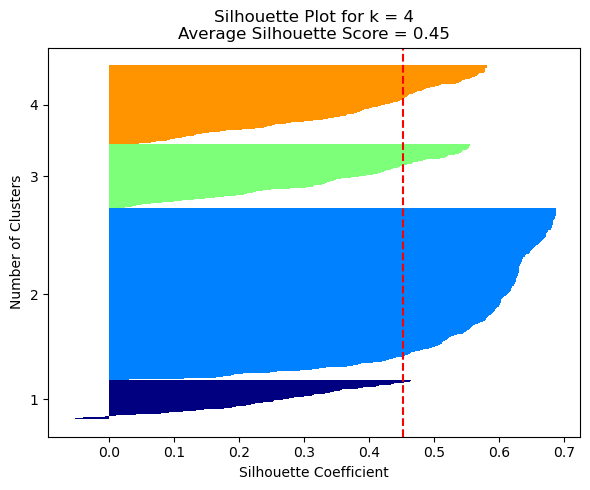

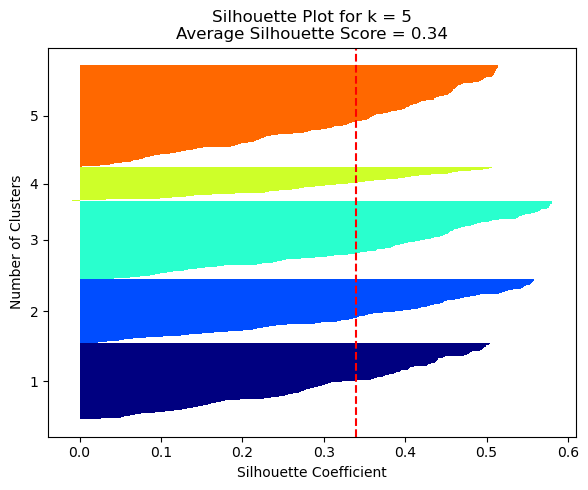

In [ ]:
# Set your input data (standardized version)
X = df2.drop(columns=['kmeans_cluster', 'agg_cluster'], errors='ignore')

# Function to plot silhouette plot for a given k
def plot_silhouette_k(k, X):
    km2 = KMeans(n_clusters=k,  
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km2.fit_predict(X)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    silhouette_avg = np.mean(silhouette_vals)

    # ------- Plotting silhouette values -------
    y_ax_lower, yticks = 0, []
    plt.figure(figsize=(6, 5))

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper = y_ax_lower + len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower = y_ax_upper

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Number of Clusters')
    plt.xlabel('Silhouette Coefficient')
    plt.title(f'Silhouette Plot for k = {k}\nAverage Silhouette Score = {silhouette_avg:.2f}')
    plt.tight_layout()
    plt.show()

# Generate silhouette plots for k = 3, 4, and 5
for k in [3, 4, 5]:
    plot_silhouette_k(k, X)


In [ ]:
#K-means++ Clustering (k=3)
clustering_X = df2.copy()

km_plus = KMeans(
    n_clusters=3, 
    init='k-means++',  
    n_init=10,
    max_iter=300,
    # tol=1e-04,
    random_state=0)

y_km_plus= km_plus.fit_predict(clustering_X)

# Add labels to df for summary
clustering_X['kmeans_cluster'] = y_km_plus

# Cluster centers
kmeans_centers = pd.DataFrame(km_plus.cluster_centers_, columns=df2.columns)
print("K-means++ Cluster Centers:")
print(kmeans_centers.round(3).to_string())

# Cluster counts
print("\nNumber of customers per K-means++ cluster:")
print(clustering_X['kmeans_cluster'].value_counts().sort_index())


K-means++ Cluster Centers:
   Gender  Marital Status  Education  Occupation  Settlement Size    Age  Income
0   0.851           0.984      2.085       1.198            1.599  1.411   1.412
1   0.352           0.006      0.809       0.012            0.063 -0.747  -0.747
2   0.859           0.998      2.112       1.218            1.601  0.200   0.200

Number of customers per K-means++ cluster:
kmeans_cluster
0    449
1    997
2    554
Name: count, dtype: int64


In [ ]:
# Agglomerative Clustering (k=3)
ac = AgglomerativeClustering(
    n_clusters=3, 
    metric='euclidean', 
    linkage='complete')
ac_labels = ac.fit_predict(clustering_X.drop(columns='kmeans_cluster'))

clustering_X['agg_cluster'] = ac_labels

# Cluster summary (mean values for interpretability)
feature_cols = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size', 'Age', 'Income']
ac_summary = clustering_X.groupby('agg_cluster')[feature_cols].mean().round(3).to_string()
print("\nAgglomerative Cluster Means:")
print(ac_summary)

# Cluster counts
print("\nNumber of customers per Agglomerative cluster:")
print(clustering_X['agg_cluster'].value_counts().sort_index())


Agglomerative Cluster Means:
             Gender  Marital Status  Education  Occupation  Settlement Size    Age  Income
agg_cluster                                                                               
0             0.767           0.850      1.911       1.033            1.392  0.586   0.586
1             0.368           0.006      0.805       0.013            0.069 -0.920  -0.920
2             0.942           1.000      2.231       1.269            1.231  2.289   2.289

Number of customers per Agglomerative cluster:
agg_cluster
0    1111
1     837
2      52
Name: count, dtype: int64
